In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
data = pd.read_csv("datos.csv",  sep = ',')
data = data.drop(columns=['frame'])
data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,labels
0,0.504313,0.374600,-0.161631,0.999962,0.514392,0.373008,-0.154843,0.999938,0.517940,0.376536,...,0.901502,0.420774,0.712442,-0.137218,0.893193,0.364911,0.650783,-0.142738,0.906649,['walking_to_camera']
1,0.505099,0.374492,-0.039187,0.999951,0.515289,0.372998,-0.034026,0.999919,0.518262,0.376534,...,0.897006,0.480845,0.672524,-0.230077,0.890972,0.373060,0.617001,-0.171139,0.896794,['walking_to_camera']
2,0.505067,0.374491,-0.062064,0.999950,0.515690,0.373596,-0.049927,0.999910,0.518328,0.377474,...,0.898330,0.464089,0.812319,-0.383315,0.894135,0.396686,0.773695,-0.335974,0.894761,['walking_to_camera']
3,0.505060,0.374496,-0.089032,0.999904,0.515604,0.373385,-0.082102,0.999777,0.518191,0.377127,...,0.887482,0.454433,0.787702,-0.291903,0.881608,0.413903,0.711325,-0.241964,0.867268,['walking_to_camera']
4,0.505049,0.374448,-0.103178,0.999894,0.515320,0.373358,-0.086771,0.999759,0.517954,0.377057,...,0.867021,0.500646,0.740875,-0.203028,0.869768,0.411382,0.668761,-0.176965,0.839642,['walking_to_camera']


In [26]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,...,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000
mean,0.499920,0.342463,-0.212385,0.998990,0.504741,0.330999,-0.213916,0.998811,0.507629,0.330896,...,0.209703,0.838313,0.518436,0.821447,0.099661,0.879039,0.460672,0.820647,0.095947,0.874428
std,0.068844,0.098266,0.270843,0.007943,0.068729,0.099781,0.246543,0.008404,0.069578,0.099787,...,0.284150,0.114057,0.088933,0.140512,0.289300,0.125945,0.079474,0.139866,0.307954,0.138949
min,0.036065,0.068799,-1.250967,0.806409,0.044960,0.048046,-1.236800,0.798544,0.047116,0.047736,...,-0.714976,0.083035,0.044957,0.443062,-0.851458,0.040267,0.036693,0.436800,-0.949595,0.056264
25%,0.469915,0.296825,-0.416616,0.999690,0.471405,0.287405,-0.395828,0.999571,0.471893,0.287424,...,0.116994,0.787971,0.465183,0.685274,0.022321,0.826779,0.410077,0.682432,0.000456,0.809054
50%,0.500116,0.334098,-0.286273,0.999908,0.506959,0.323740,-0.276491,0.999841,0.510357,0.323386,...,0.224362,0.858890,0.520649,0.862769,0.121801,0.929320,0.467690,0.862434,0.118427,0.940106
75%,0.531797,0.382690,0.010323,0.999973,0.540053,0.372376,-0.008150,0.999936,0.545441,0.372306,...,0.350953,0.919297,0.586471,0.923912,0.232963,0.966424,0.500083,0.928957,0.237783,0.972180
max,0.897141,0.847356,0.736383,0.999998,0.900005,0.835987,0.719173,0.999994,0.904192,0.834645,...,1.141757,0.997456,0.886157,1.935614,1.058763,0.991196,0.864255,1.895901,1.098083,0.992185


In [27]:
#Theonly None valus ar the labels
data.dropna(inplace=True)


In [28]:
data.replace(np.nan, "unknown", inplace=True)

In [29]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,...,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000
mean,0.500737,0.339859,-0.195938,0.998669,0.505018,0.328681,-0.199306,0.998436,0.507584,0.328545,...,0.226664,0.839791,0.515826,0.810523,0.124929,0.874441,0.466587,0.810634,0.118260,0.869370
std,0.070768,0.093355,0.272623,0.009658,0.070473,0.094666,0.249062,0.010219,0.071213,0.094645,...,0.268714,0.109259,0.087652,0.136317,0.273219,0.115257,0.082634,0.135968,0.287163,0.132180
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.469649,0.294351,-0.406732,0.999649,0.470652,0.283052,-0.388142,0.999517,0.471195,0.283250,...,0.125634,0.787624,0.466035,0.677085,0.039711,0.817135,0.422760,0.676930,0.017908,0.802107
50%,0.498145,0.330032,-0.238237,0.999891,0.502485,0.318122,-0.234089,0.999816,0.505273,0.317916,...,0.222742,0.857961,0.514608,0.850923,0.132245,0.913704,0.473629,0.847418,0.121607,0.925159
75%,0.530902,0.377382,0.047592,0.999966,0.538764,0.366071,0.030253,0.999922,0.544046,0.365923,...,0.350104,0.919664,0.576885,0.919609,0.244945,0.962711,0.505257,0.923526,0.243595,0.969089
max,0.897141,0.658496,0.736383,0.999998,0.900005,0.639512,0.719173,0.999991,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.864255,1.221757,1.098083,0.992185


In [30]:
data['labels'].unique()

array(["['walking_to_camera']", "['walking_away']", "['spinning']",
       "['walking_left_to_right']", "['walking_right_to_left']",
       "['spinning', 'siting_down']", "['standing_up']",
       "['walking_away', 'spinning']", "['siting_down']",
       "['walking_to_camera', 'walking_away']",
       "['walking_to_camera', 'spinning']"], dtype=object)

In [31]:
data = data[~data['labels'].isin(["['walking_right_to_left']", "['walking_left_to_right']"])]
data.reset_index(drop=True, inplace=True)

In [32]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,...,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000
mean,0.500418,0.342282,-0.196727,0.998668,0.504736,0.331182,-0.200076,0.998432,0.507329,0.331043,...,0.226786,0.840731,0.515786,0.807968,0.124462,0.874440,0.466090,0.808139,0.117596,0.870127
std,0.064939,0.091844,0.274349,0.009726,0.064629,0.093052,0.250587,0.010292,0.065444,0.093037,...,0.270305,0.107649,0.083550,0.135413,0.274614,0.115748,0.078246,0.135322,0.288771,0.130962
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.469969,0.295955,-0.408428,0.999649,0.471057,0.286766,-0.390054,0.999518,0.471583,0.286794,...,0.126097,0.788787,0.466983,0.675283,0.039468,0.816331,0.423954,0.674774,0.017089,0.802363
50%,0.498125,0.331080,-0.243120,0.999893,0.502455,0.319855,-0.240192,0.999819,0.505186,0.319692,...,0.222763,0.858247,0.514723,0.847571,0.132175,0.914517,0.473482,0.845138,0.121293,0.925667
75%,0.529950,0.378146,0.049092,0.999966,0.538090,0.366602,0.031614,0.999922,0.543565,0.366341,...,0.350623,0.918910,0.576006,0.918016,0.243583,0.963016,0.504591,0.921802,0.242608,0.968996
max,0.897141,0.658496,0.736383,0.999998,0.900005,0.639512,0.719173,0.999991,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.863166,1.221757,1.098083,0.992185


In [33]:
data = data[data['labels'].str.len() <= 21]
data.reset_index(drop=True, inplace=True)

In [34]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.505953,0.332239,-0.207129,0.998372,0.508697,0.332096,...,0.224488,0.838891,0.518374,0.812379,0.119937,0.877552,0.465604,0.812631,0.112889,0.872908
std,0.065917,0.091617,0.267762,0.009959,0.065560,0.092846,0.244635,0.010537,0.066352,0.092835,...,0.274894,0.107119,0.084301,0.134216,0.278142,0.112029,0.079432,0.134002,0.293197,0.129445
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.470822,0.295828,-0.408287,0.999645,0.471950,0.286698,-0.389848,0.999516,0.472432,0.286641,...,0.122566,0.788150,0.471585,0.678105,0.034981,0.821240,0.422197,0.680350,0.011797,0.805799
50%,0.499477,0.330310,-0.253969,0.999891,0.504586,0.318574,-0.252486,0.999815,0.508667,0.318306,...,0.221331,0.857266,0.518578,0.853363,0.128671,0.917804,0.472000,0.851550,0.117312,0.929146
75%,0.531867,0.378887,0.028987,0.999966,0.539414,0.366907,0.013396,0.999923,0.544698,0.366732,...,0.351651,0.916798,0.579100,0.919530,0.241473,0.963432,0.503946,0.922871,0.237782,0.969460
max,0.897141,0.648112,0.736383,0.999998,0.900005,0.631986,0.719173,0.999991,0.904192,0.629887,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


In [35]:
face_landmarks = [f'landmark_{i}' for i in range(1,11)]
full_face_landmarks = [f'landmark_{i}_x' for i in range(1,11)] + [f'landmark_{i}_y' for i in range(1,11)] + [f'landmark_{i}_z' for i in range(1,11)]

data = data.drop(columns=full_face_landmarks)
data.describe()


,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_vis,landmark_2_vis,landmark_3_vis,landmark_4_vis,landmark_5_vis,landmark_6_vis,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.998372,0.998314,0.998436,0.998326,0.998217,0.998308,...,0.224488,0.838891,0.518374,0.812379,0.119937,0.877552,0.465604,0.812631,0.112889,0.872908
std,0.065917,0.091617,0.267762,0.009959,0.010537,0.010634,0.010098,0.010327,0.010629,0.010111,...,0.274894,0.107119,0.084301,0.134216,0.278142,0.112029,0.079432,0.134002,0.293197,0.129445
min,0.036065,0.068799,-1.236279,0.806409,0.798544,0.809487,0.800681,0.791550,0.807736,0.798267,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.470822,0.295828,-0.408287,0.999645,0.999516,0.999460,0.999523,0.999462,0.999374,0.999409,...,0.122566,0.788150,0.471585,0.678105,0.034981,0.821240,0.422197,0.680350,0.011797,0.805799
50%,0.499477,0.330310,-0.253969,0.999891,0.999815,0.999796,0.999814,0.999805,0.999782,0.999792,...,0.221331,0.857266,0.518578,0.853363,0.128671,0.917804,0.472000,0.851550,0.117312,0.929146
75%,0.531867,0.378887,0.028987,0.999966,0.999923,0.999917,0.999923,0.999918,0.999909,0.999915,...,0.351651,0.916798,0.579100,0.919530,0.241473,0.963432,0.503946,0.922871,0.237782,0.969460
max,0.897141,0.648112,0.736383,0.999998,0.999991,0.999988,0.999989,0.999991,0.999992,0.999992,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


Varianza explicada por cada componente principal:
Componente 1: 0.2684
Componente 2: 0.1554
Componente 3: 0.1363
Componente 4: 0.1004
Componente 5: 0.0873
Componente 6: 0.0700
Componente 7: 0.0448
Componente 8: 0.0272
Componente 9: 0.0203
Componente 10: 0.0169
Componente 11: 0.0151
Componente 12: 0.0137
Componente 13: 0.0074
Componente 14: 0.0047
Componente 15: 0.0041
Componente 16: 0.0037
Componente 17: 0.0035
Componente 18: 0.0027
Componente 19: 0.0025
Componente 20: 0.0019
Componente 21: 0.0018
Componente 22: 0.0016
Componente 23: 0.0013
Componente 24: 0.0011
Componente 25: 0.0010


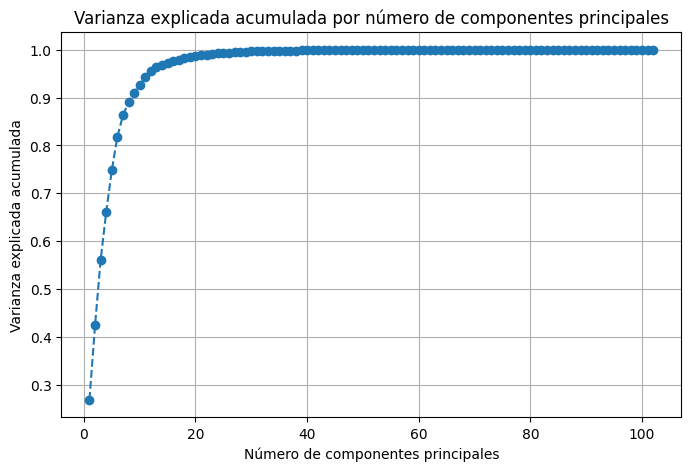

In [36]:
#Calcular la varianza explicada acumulada

data_2=data.drop('labels', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

/tmp/ipykernel_39040/2234185586.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


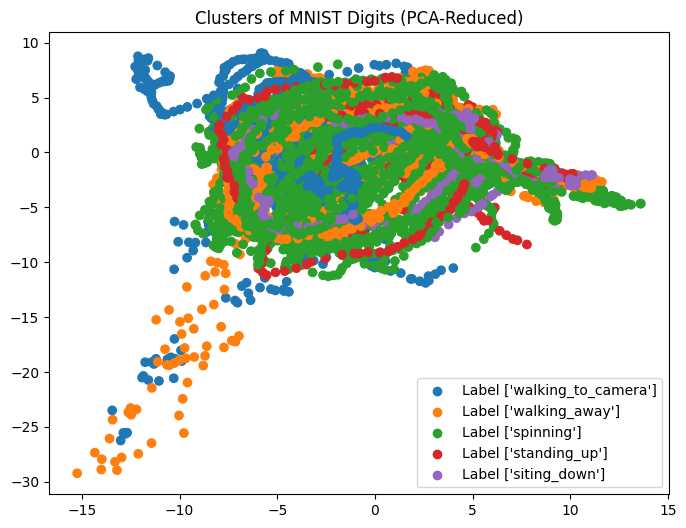

In [37]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


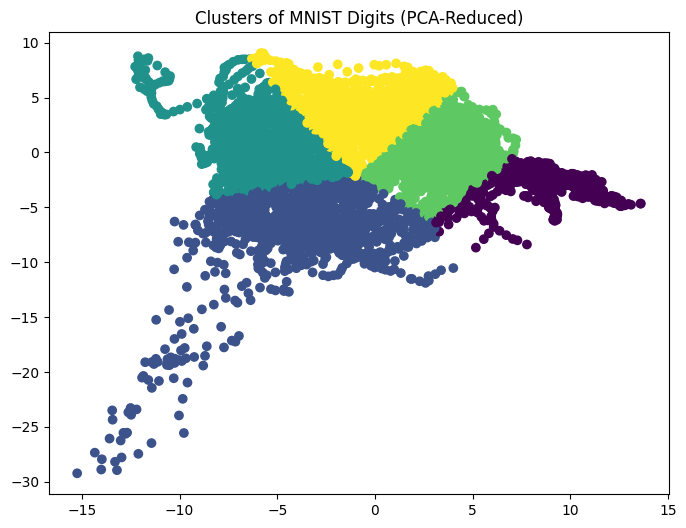

In [38]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

In [39]:
result_data = []

df = data.copy()

grouped = df.groupby('labels')

for label, group in grouped:

    for i in range(0, len(group)-5):
        frame_group = group.iloc[i:i + 5]


        if len(frame_group) >= 5:

            group_data = {'label': label}
            landmark_numbers = [0]
            aaa = [x for x in range(11,33)]
            landmark_numbers.extend(aaa)
            for j in landmark_numbers:  
                for k in range(5): 
                    group_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                    group_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                    group_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']
                    group_data[f'landmark_{j}_vis_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_vis']


            result_data.append(group_data)


result_df = pd.DataFrame(result_data)

result_df

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_vis_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_vis_frame_2,landmark_0_x_frame_3,...,landmark_32_z_frame_3,landmark_32_vis_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_vis_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5,landmark_32_vis_frame_5
0,['siting_down'],0.506982,0.312884,-0.153815,0.999971,0.506976,0.322255,-0.162903,0.999972,0.506704,...,0.018547,0.974986,0.486525,0.649284,0.006087,0.975438,0.486592,0.649323,0.024052,0.973196
1,['siting_down'],0.506976,0.322255,-0.162903,0.999972,0.506704,0.336078,-0.165757,0.999974,0.506140,...,0.006087,0.975438,0.486592,0.649323,0.024052,0.973196,0.486400,0.649202,-0.061893,0.972391
2,['siting_down'],0.506704,0.336078,-0.165757,0.999974,0.506140,0.352122,-0.162915,0.999975,0.505722,...,0.024052,0.973196,0.486400,0.649202,-0.061893,0.972391,0.485684,0.648480,-0.069051,0.965230
3,['siting_down'],0.506140,0.352122,-0.162915,0.999975,0.505722,0.368046,-0.179150,0.999976,0.505637,...,-0.061893,0.972391,0.485684,0.648480,-0.069051,0.965230,0.485694,0.648765,-0.048763,0.957377
4,['siting_down'],0.505722,0.368046,-0.179150,0.999976,0.505637,0.384477,-0.181030,0.999978,0.505688,...,-0.069051,0.965230,0.485694,0.648765,-0.048763,0.957377,0.485646,0.647994,-0.047828,0.946526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10182,['walking_to_camera'],0.524668,0.499180,-0.171147,0.999309,0.520737,0.499179,-0.194117,0.999371,0.515642,...,-0.076270,0.933701,0.504294,0.743449,-0.129334,0.938779,0.500980,0.742990,-0.091948,0.943419
10183,['walking_to_camera'],0.520737,0.499179,-0.194117,0.999371,0.515642,0.499163,-0.208151,0.999431,0.510873,...,-0.129334,0.938779,0.500980,0.742990,-0.091948,0.943419,0.501049,0.742644,-0.087652,0.947690
10184,['walking_to_camera'],0.515642,0.499163,-0.208151,0.999431,0.510873,0.498703,-0.220155,0.999483,0.504623,...,-0.091948,0.943419,0.501049,0.742644,-0.087652,0.947690,0.502614,0.742538,-0.082333,0.951218
10185,['walking_to_camera'],0.510873,0.498703,-0.220155,0.999483,0.504623,0.498156,-0.246667,0.999530,0.500374,...,-0.087652,0.947690,0.502614,0.742538,-0.082333,0.951218,0.502629,0.742453,-0.110198,0.954608


(10187, 345)
Varianza explicada por cada componente principal:
Componente 1: 0.3301
Componente 2: 0.1676
Componente 3: 0.1446
Componente 4: 0.1240
Componente 5: 0.0988
Componente 6: 0.0386
Componente 7: 0.0226
Componente 8: 0.0099
Componente 9: 0.0057
Componente 10: 0.0050
Componente 11: 0.0047
Componente 12: 0.0044
Componente 13: 0.0039
Componente 14: 0.0037
Componente 15: 0.0035
Componente 16: 0.0033
Componente 17: 0.0026
Componente 18: 0.0019
Componente 19: 0.0017
Componente 20: 0.0015
Componente 21: 0.0014
Componente 22: 0.0013
Componente 23: 0.0011
Componente 24: 0.0011


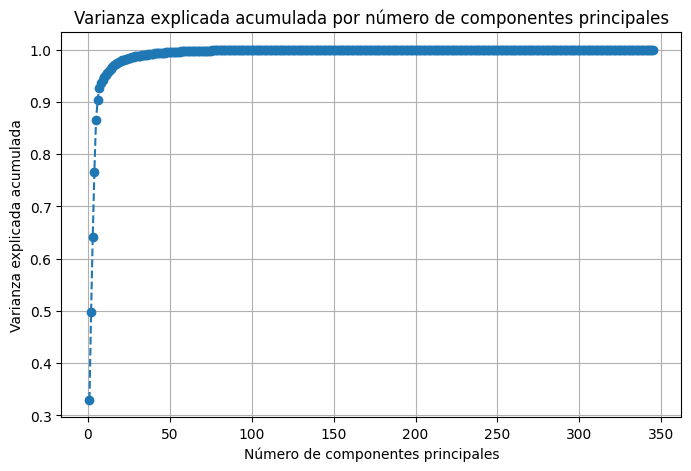

In [ ]:
#Calcular la varianza explicada acumulada

data_group=result_df.drop('label', axis=1)
print(data_group.shape)
X = StandardScaler().fit_transform(data_group)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

/tmp/ipykernel_39040/1628319642.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


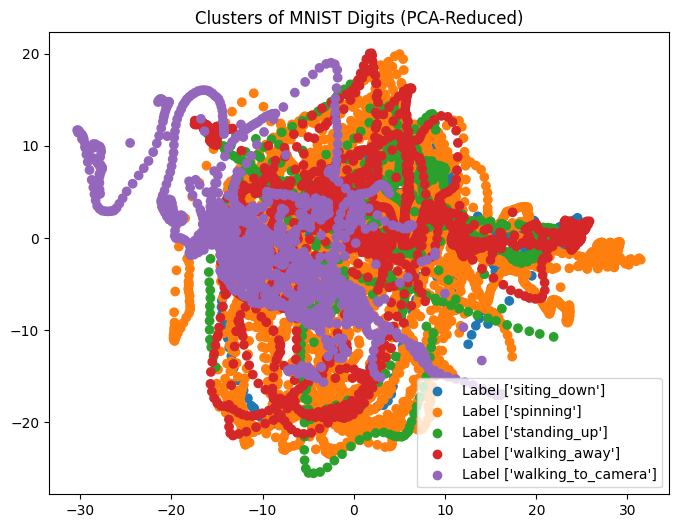

In [20]:
labels = result_df['label']

data_group=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_group)

pca = PCA(n_components=29)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

/tmp/ipykernel_39040/4192807430.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

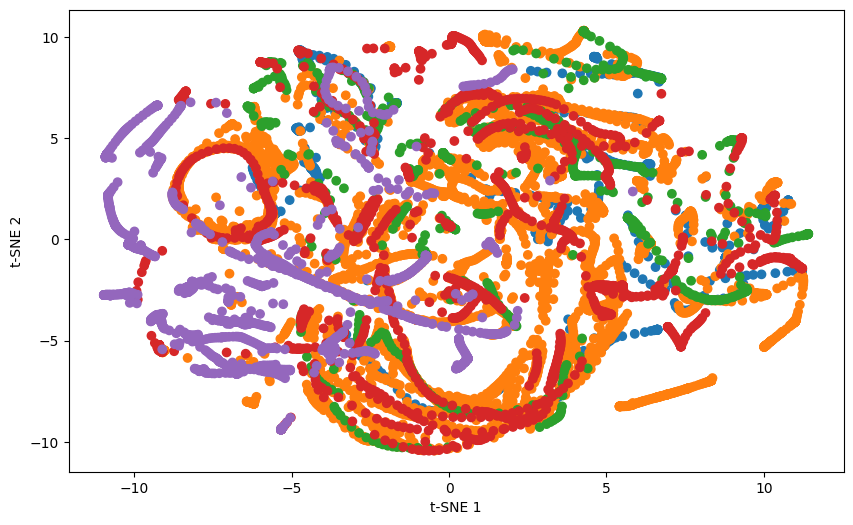

In [21]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [40]:
result_df.to_csv("datos_procesados.csv")

In [41]:
# Normalize the columns and save the values they were divided by
normalization_factors = {}

for column in result_df.columns:
    if result_df[column].dtype == np.float64:
        max_value = result_df[column].max()
        if (max_value >1):
            normalization_factors[column] = max_value
            result_df[column] = result_df[column] / max_value
        else:
            normalization_factors[column] = 1
            result_df[column] = result_df[column] / 1

# Save the normalization factors to a CSV file
normalization_factors_df = pd.DataFrame(list(normalization_factors.items()), columns=['Column', 'Normalization Factor'])
normalization_factors_df.to_csv('normalization_factors.csv', index=False)

# Save the normalized dataframe to a CSV file
result_df.to_csv('normalized_result_df.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transform labels into a numeric variable
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.964414646725116

Matriz de Confusión:
 [[170   7   0   0   1]
 [  0 897   2   3   4]
 [  1   5 185   5   4]
 [  0  14   1 319   7]
 [  1  10   2   2 299]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.96      0.99      0.98       906
           2       0.97      0.93      0.95       200
           3       0.97      0.94      0.95       341
           4       0.95      0.95      0.95       314

    accuracy                           0.96      1939
   macro avg       0.97      0.95      0.96      1939
weighted avg       0.96      0.96      0.96      1939

